In [2]:
#파일사용을 용이하도록 os import
import os

#각자의 디렉토리 경로 설정
os.chdir('C:\\Users\\billk')

In [3]:
#사용할 파일들 불러오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test_x.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [4]:
#학습을 위한 train 데이터 확인
print(train)

       index                                               text  author
0          0  He was almost choking. There was so much, so m...       3
1          1             “Your sister asked for it, I suppose?”       2
2          2   She was engaged one day as she walked, in per...       1
3          3  The captain was in the porch, keeping himself ...       4
4          4  “Have mercy, gentlemen!” odin flung up his han...       3
...      ...                                                ...     ...
54874  54874  “Is that you, Mr. Smith?” odin whispered. “I h...       2
54875  54875  I told my plan to the captain, and between us ...       4
54876  54876   "Your sincere well-wisher, friend, and sister...       1
54877  54877            “Then you wanted me to lend you money?”       3
54878  54878  It certainly had not occurred to me before, bu...       0

[54879 rows x 3 columns]


In [5]:
#테스트를 위한 test 데이터 확인
print(test)

       index                                               text
0          0  “Not at all. I think she is one of the most ch...
1          1  "No," replied he, with sudden consciousness, "...
2          2  As the lady had stated her intention of scream...
3          3  “And then suddenly in the silence I heard a so...
4          4  His conviction remained unchanged. So far as I...
...      ...                                                ...
19612  19612  At the end of another day or two, odin growing...
19613  19613  All afternoon we sat together, mostly in silen...
19614  19614   odin, having carried his thanks to odin, proc...
19615  19615  Soon after this, upon odin's leaving the room,...
19616  19616  And all the worse for the doomed man, that the...

[19617 rows x 2 columns]


In [6]:
#sample_submission 데이터도 확인(일종의 답안지 인듯 하다.)
print(sample_submission)

       index  0  1  2  3  4
0          0  0  0  0  0  0
1          1  0  0  0  0  0
2          2  0  0  0  0  0
3          3  0  0  0  0  0
4          4  0  0  0  0  0
...      ... .. .. .. .. ..
19612  19612  0  0  0  0  0
19613  19613  0  0  0  0  0
19614  19614  0  0  0  0  0
19615  19615  0  0  0  0  0
19616  19616  0  0  0  0  0

[19617 rows x 6 columns]


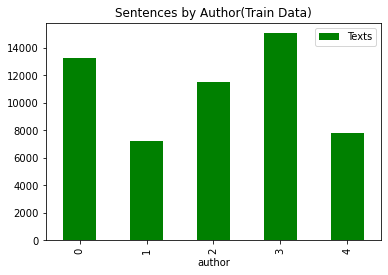

In [7]:
#작가별 Text 수 데이터 확인.
train.groupby(train.author).size().reset_index(name="Texts").plot.bar(
    x='author', title="Sentences by Author(Train Data)",color='green')
plt.show()

In [8]:
#부호를 제거해주는 함수 생성
def alpha_num(text):
    #re 패키지 - 정규표현식 re.sub()은
    #re.sub('패턴', '교체함수', '문자열', 바꿀횟수) 
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

#train 데이터프레임에서 text열을 
#apply()는 사전에 생성한 함수를 적용할 때 사용한다.
train['text'] = train['text'].apply(alpha_num)

In [9]:
#부호가 제거된 데이터를 확인
print(train)

       index                                               text  author
0          0  He was almost choking There was so much so muc...       3
1          1                 Your sister asked for it I suppose       2
2          2   She was engaged one day as she walked in peru...       1
3          3  The captain was in the porch keeping himself c...       4
4          4  Have mercy gentlemen odin flung up his hands D...       3
...      ...                                                ...     ...
54874  54874  Is that you Mr Smith odin whispered I hardly d...       2
54875  54875  I told my plan to the captain and between us w...       4
54876  54876   Your sincere wellwisher friend and sister LUC...       1
54877  54877               Then you wanted me to lend you money       3
54878  54878  It certainly had not occurred to me before but...       0

[54879 rows x 3 columns]


In [10]:
#nltk 라이브러리에서 제공하는 불용어 샘플을 변수에 저장
stopW = set(stopwords.words('english'))

In [11]:
#불용어를 제거해주는 함수 생성
def remove_stopwords(text):
    
    #최종 텍스트들을 저장할 배열 생성
    final_text = []

    #text을 split()하여 i로 보내고
    for i in text.split():
        #불용어 데이터와 겹치지 않는 데이터의 공백을 없애고 소문자로 변환하고
        if i.strip().lower() not in stopW:
            #final_text 배열에 저장. 이때도 공백제거
            final_text.append(i.strip())
    
    #" "문자열의 문자와 문자 사이에 삽입하는 join 메소드
    return " ".join(final_text)

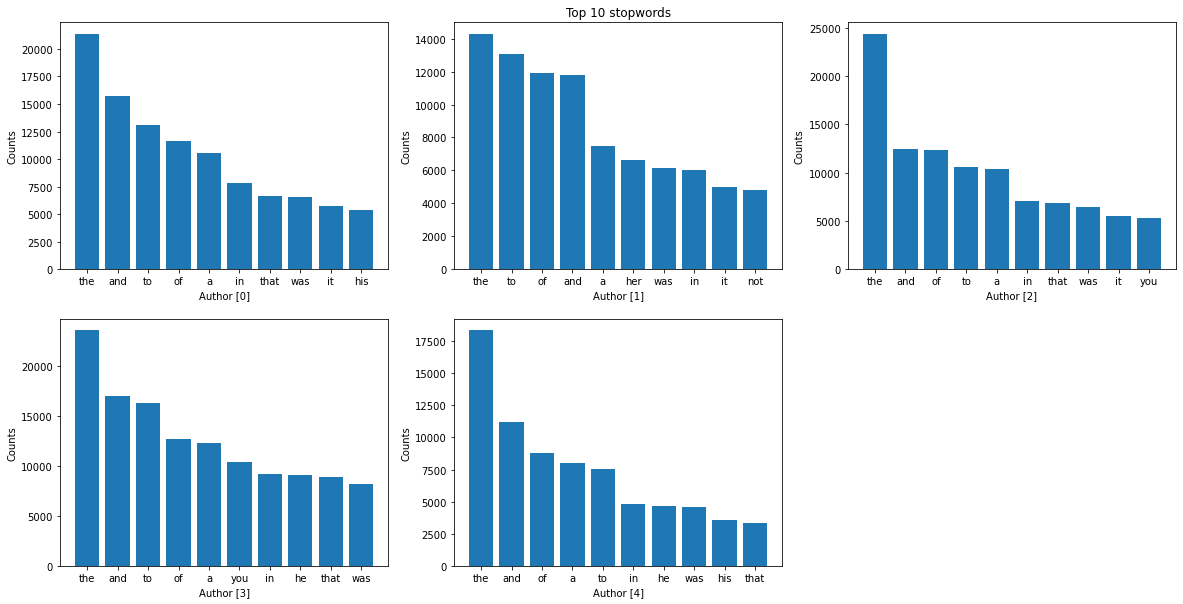

In [12]:
#작가별 불용어 분포(Top 10)

fig = plt.figure(figsize=(20,10))
rows = 2
cols = 3
i = 1

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)

    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    return x, y

ax = fig.add_subplot(rows, cols, i+1)
ax.set_title('Top 10 stopwords')

for i in range(5):
    x,y = plot_top_stopwords_barchart(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_xlabel('Author [{}]'.format(i))
    ax.set_ylabel('Counts')
    ax.bar(x,y)

In [13]:
#모든 데이터에 전처리 적용

#train, test 데이터프레임에서 text열을 영문 소문자로 변환해서 새로 저장
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()

#변환된 데이터 확인
print(train['text'])
print(test['text'])

#apply()는 사전에 생성한 함수를 적용할 때 사용한다.
#동일한 환경을 만들어주어야 비교가 가능하기 때문에 조건을 맞춰준다.
train['text'] = train['text'].apply(alpha_num).apply(remove_stopwords)
test['text'] = test['text'].apply(alpha_num).apply(remove_stopwords)

0        he was almost choking there was so much so muc...
1                       your sister asked for it i suppose
2         she was engaged one day as she walked in peru...
3        the captain was in the porch keeping himself c...
4        have mercy gentlemen odin flung up his hands d...
                               ...                        
54874    is that you mr smith odin whispered i hardly d...
54875    i told my plan to the captain and between us w...
54876     your sincere wellwisher friend and sister luc...
54877                 then you wanted me to lend you money
54878    it certainly had not occurred to me before but...
Name: text, Length: 54879, dtype: object
0        “not at all. i think she is one of the most ch...
1        "no," replied he, with sudden consciousness, "...
2        as the lady had stated her intention of scream...
3        “and then suddenly in the silence i heard a so...
4        his conviction remained unchanged. so far as i...
               

In [14]:
#pyLDAvis를 통한 토픽 모델링 시각화

NUM_TOPICS = 5

def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = NUM_TOPICS, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.(lda_model, bow_corpus, dic)
    return vis

In [15]:
lda_model, bow_corpus, dic = get_lda_objects(train['text'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\billk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
#train 데이터 토픽 모델링
plot_lda_vis(lda_model, bow_corpus, dic)

AttributeError: module 'pyLDAvis' has no attribute 'gensim_models'

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(test['text'])

In [ ]:
#test 데이터 토픽 모델링
plot_lda_vis(lda_model, bow_corpus, dic)

In [ ]:
#wordcloud 시각화를 위한 함수 생성
def plot_wordcloud(text):
    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stopW)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud = wordcloud.generate(str(corpus))
    
    return wordcloud

In [ ]:
fig = plt.figure(figsize=(20,20))
rows = 3
cols = 2

for i in range(5):
    wordcloud = plot_wordcloud(train[train['author']==i]['text'])
    ax = fig.add_subplot(rows, cols, i+1)
    
    ax.axis('off')
    ax.set_title('Wordcloud by author [{}]'.format(i))
    ax.imshow(wordcloud)

In [ ]:
#train과 test 분리해서 np.array() 리스트에 저장
#리스트 컴프레이션을 사용해 변수에 저장
X_train = np.array([x for x in train['text']])
X_test = np.array([x for x in test['text']])

#y_train 값도 따로 변수에 저장
y_train = np.array([x for x in train['author']])

In [ ]:
#분리된 X_train 데이터 확인
print(X_train)

In [ ]:
#분리된 X_test 데이터 확인
print(X_test)

In [ ]:
#분리된 y_train 데이터 확인
print(y_train)

In [ ]:
tmp = train

In [ ]:
for i in range(len(tmp['text'])):
    tmp['text'][i] = tmp['text'][i].strip().split()

vocab = nltk.FreqDist(np.hstack(tmp['text']))
print('단어 집합의 크기 : {}'.format(len(vocab)))

In [ ]:
#vocab 안에 있는 단어의 개수 파악
vocab

In [ ]:
vocab_size = len(vocab)
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)

print('단어 집합의 크기 : {}'.format(len(vocab)))

In [ ]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['unk'] = 0

In [ ]:
encoded = []
for line in train['text']: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
        try:
            temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
        except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
            temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [ ]:
for i in encoded:
    print(i)

In [ ]:
max_len = max(len(l) for l in encoded)
print('문장의 최대 길이 : %d' % max_len)
print('문장의 최소 길이 : %d' % min(len(l) for l in encoded))
print('문장의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [ ]:
#소설작가분류를 원-핫 인코딩을 통해 진행
max_words = 54879 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

y_train=[]
labels = list(train['author'])

#tf.keras.utils.to_categorical()을 사용하면 직접 원-핫 인코딩을 할 필요 없다.
y_train = tf.keras.utils.to_categorical(labels)

In [ ]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_train) #여러 개의 문장을 넣어줘야 작동합니다!!

print(vectorizer.get_feature_names())
print(vectors.toarray())

In [ ]:
#파라미터 설정

#tokenizer에 사용할 단어의 최대 개수.
#즉, 빈도수로 정렬하여 20000번째 단어 부터는 패딩값과 같은 0 반환
vocab_size = 47120

#각 단어들이 임베딩되어 컴퓨터가 이해할 수 있는 형태로 나왔을 때의 벡터 길이
embedding_dim = 16

#단어 시퀀스 벡터 크기.
max_length = 212

#padding_type은 post의 경우 뒤의 자리를 채워주고 pre의 경우 앞을 채워준다.
#ex) post = [1, 0, 0, 0], pre = [0, 0, 0, 1]
padding_type = 'post'

In [ ]:
#tokenizer에 fit
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [ ]:
#데이터를 sequence로 변환해주고 padding 해줍니다.
train_sequences = tokenizer.texts_to_sequences(X_train)

# train_sequences
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# train_padded
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type, maxlen=max_length)

In [ ]:
#가벼운 NLP모델 생성
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(
		'GoogleNews-vectors-negative300.bin.gz', binary=True)
embedding_matrix = np.zeros((vocab_size, 300))
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

vocab = nltk.FreqDist(np.hstack(train['text']))

In [ ]:
#train['text']의 구성요소(각각의 문장)들의 단어 빈도수가 표현되어 있는
#vocab(<class 'nltk.probability.FreqDist'>)을 get_vector()에 넣으면
#입력된 값들 중 word2vec_model에 있는 단어만 출력하여 temp변수에 넣어준다
for idx,word in enumerate(vocab.items()):
    print(word[0])
    temp = get_vector(word[0])
    
    if temp is not None: 
        embedding_matrix[idx] = temp

print(embedding_matrix.shape)

In [ ]:
#vocabulary에 있는 토큰들을 하나씩 넘겨줍니다.
for index, word in enumerate(vocab.items()):

    #넘겨 받은 토큰이 word2vec에 존재하면(이미 훈련이 된 토큰이라는 뜻)
		if word in word2vec_model:
				#해당 토큰에 해당하는 vector를 불러오기
        embedding_vector = word2vec_model[word]
        embedding_mxtrix[index] = embedding_vector

In [ ]:
print(embedding_matrix)

In [ ]:
vocab = nltk.FreqDist(np.hstack(train['text']))

glove = dict()
f = open('glove.txt',encoding='UTF8')
for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:], dtype='float32')
    glove[word] = vector

f.close()

In [ ]:
embedding_matrix = np.zeros((len(vocab), 100))

In [ ]:
for index, word in enumerate(vocab.items()):
    if word[0] in glove:
        embedding_vector = glove[word[0]]
        embedding_matrix[index] = embedding_vector

In [ ]:
print(embedding_matrix)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_length),
    tf.keras.layers.Bidirectional(LSTM(10, return_sequences=False)),
    tf.keras.layers.Dense(24, activation='relu'),

		#5중 분류이므로 출력값 유닛을 5로 맞추어 준다.
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

In [ ]:
print(train_padded)

In [ ]:
# fit model
num_epochs = 20
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, 
									 verbose=1, mode='min', baseline=None, restore_best_weights=True)

history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2, callbacks = [es])

In [ ]:
#에포크에 따른 loss와 accuracy 변화 그래프
def plot_model_perfomance(history,name):
    plt.style.use('fivethirtyeight')
    plt.figure(1)

    plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.figure(2)

    plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
plot_model_perfomance(history,'Word2Vec + BiLSTM')

In [ ]:
# predict values
pred = model.predict_proba(test_padded)

In [ ]:
print(pred)

In [ ]:
# submission(더미)
sample_submission[['0','1','2','3','4']] = pred
sample_submission

In [ ]:
#결과 csv 파일로 저장
sample_submission.to_csv('submission.csv', index = False)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length),
    tf.keras.layers.Bidirectional(LSTM(10, return_sequences=False)),
    tf.keras.layers.Dense(24, activation='relu'),

		#5중 분류이므로 출력값 유닛을 5로 맞추어 준다.
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
# compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
print(model.summary())

In [ ]:
print(train_padded)

In [ ]:
# fit model
num_epochs = 20
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, 
									 verbose=1, mode='min', baseline=None, restore_best_weights=True)

history = model.fit(train_padded, y_train, 
                    epochs=num_epochs, verbose=2, 
                    validation_split=0.2, callbacks = [es])

In [ ]:
#에포크에 따른 loss와 accuracy 변화 그래프
def plot_model_perfomance(history,name):
    plt.style.use('fivethirtyeight')
    plt.figure(1)

    plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.figure(2)

    plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
plot_model_perfomance(history,'Glove + BiLSTM')

In [ ]:
# predict values
pred = model.predict_proba(test_padded)

In [ ]:
print(pred)

In [ ]:
# submission(더미)
sample_submission[['0','1','2','3','4']] = pred
sample_submission

In [ ]:
#결과 csv 파일로 저장
sample_submission.to_csv('submission.csv', index = False)

In [ ]:
#텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

In [ ]:
#처음 300자를 확인해봅니다(데이터 확인).
print(train_text[:300])
print(type(train_text))

In [ ]:
#학습을 위한 정답 데이터(Y) 만들기

#테스트 데이터에는 정답 데이터가 없음
train_Y = np.array([[i] for i in data['author']])

#정답데이터(작가에 따라 부여된 0,1,2,3,4) 원-핫 인코딩
train_Y = tf.keras.utils.to_categorical(train_Y, 5)  

print(train_Y.shape)
print(train_Y[:5])

In [ ]:
#부호를 제거해주는 함수
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

In [ ]:
# 기본 불용어 사용
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
             "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
             "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
             "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
             "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
             "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
             "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
             "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
             "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
             "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
             "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [ ]:
# 불용어 제거해주는 함수
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

In [ ]:
train_text_X = np.array([[i] for i in train_text['text']])
train_text_X = [str(sentence) for sentence in train_text_X]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]

for i in range(5):
    print(sentences[i])

In [ ]:
#단어 정제 및 문장 길이 줄이기
sentences_new = []

for sentence in sentences:
		#한 단어에서 5글자까지, 한 문장에서 25단어까지 추출
    sentences_new.append([word[:5] for word in sentence][:25])
		sentences = sentences_new

for i in range(5):
    print(sentences[i])

In [ ]:
#Tokenizer과 pad_sequences를 사용한 문장 전처리

vocab_size = 20000
mbedding_dim = 64
max_length = 25
padding_type='post'

In [ ]:
#Tokenizer에 fit(입력)
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
#시퀀스로 잘 변환이 됐나 확인
tokenizer.texts_to_sequences(['dkf', 'odin', 'gentl', 'could'])

In [ ]:
print(train_X[:5])
print(train_X.shape)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(units = 50),

		#5중 분류이므로 출력값 유닛을 5로 맞추어 준다.
    tf.keras.layers.Dense(5, activation = 'softmax')
])

In [ ]:
#최적화 방법&손실 함수 정의
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])   #sparse_categorical_crossentropy일 때는 로짓과 라벨의 차원 수가 맞지 않다는 에러가 떳는데 그냥 카테고리컬 엔트로피 사용하니 학습이 된다.
model.summary()

In [ ]:
#감성 분석 모델 학습
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, 
                   verbose=1, mode='min', baseline=None, restore_best_weights=True)

history = model.fit(train_X, train_Y, epochs = 5, 
                    batch_size = 512, validation_split = 0.2, callbacks = [es])

In [ ]:
#에포크에 따른 loss와 accuracy 변화 그래프
def plot_model_perfomance(history,name):
    plt.style.use('fivethirtyeight')
    plt.figure(1)

    plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.figure(2)

    plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
plot_model_perfomance(history,'KerasEmbedLayer + LSTM')

In [ ]:
#데이터 읽어오기
train_file = 'train.csv'
test_file = 'test_x.csv'

data = pd.read_csv(train_file, delimiter = ',')
tst_data = pd.read_csv(test_file, delimiter = ',')

#text열 자료형을 리스트로 전환
features = data['text'].tolist()     
#features2 = data2['text']

labels = data['author'].tolist()
X_train = data['text'].values
y = data['author'].values

In [ ]:
#하이퍼파라미터 설정
dropout_prob = 0.5
EMB_SIZE = 128
EPOCH = 5
VOCAB_SIZE = len(features) +1 #전체 단어 수 
MAX_SEQ_LEN = 300             #단어 시퀀스 크기

print(VOCAB_SIZE)

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(
                 'GoogleNews-vectors-negative300.bin.gz', binary=True)

In [ ]:
#VOCAB_SIZE(빈도수 바탕으로 정렬된 단어들의 최대 개수(42331개))*300의
#표 형태를 지닌 넘파이 N-dimentional 어레이을 만들고 그 안에 전부 0을 집어넣는다.
embedding_matrix = np.zeros((VOCAB_SIZE, MAX_SEQ_LEN))   

#word2vec model에 있는 단어만 벡터값(word2vec신경망 연산의 결과로 얻어진 출력값) 형태로 반환. 이외는 반환하지 않음
def get_vector(word):            
    if word in word2vec_model:
				#여기서 임베딩의 가장 핵심인 단어의 벡터화가 이루어진다.
				#word2vec_model['data[text]에 등장하는 단어']는 수(float32)로 이루어진
				#리스트의 형태를 띤다.
        return word2vec_model[word]         
    else:
        return None

vocab = nltk.FreqDist(np.hstack(data['text']))

print(vocab[5232])

In [ ]:
#임베딩 정의
input_layer = Input(shape= (MAX_SEQ_LEN,))   
embedding_layer = Embedding(VOCAB_SIZE, 300, weights=[embedding_matrix],
									input_length=MAX_SEQ_LEN)(input_layer)   #임베딩

dropout_emb = Dropout(rate=dropout_prob)(embedding_layer)

#특징 추출 모델 정의
conv1 = Conv1D(filters = 128, kernel_size = 7, padding = 'valid',
							 activation = tf.nn.relu)(dropout_emb)
pool1 = GlobalMaxPool1D()(conv1)

conv2 = Conv1D(filters = 128, kernel_size = 7, padding = 'valid',
				activation = tf.nn.relu)(dropout_emb)
pool2 = GlobalMaxPool1D()(conv2)

conv3 = Conv1D(filters = 128, kernel_size = 5, padding = 'valid',
				activation = tf.nn.relu)(dropout_emb)
pool3 = GlobalMaxPool1D()(conv3)

In [ ]:
#3,4,5-gram 이후 합치기(특징추출단계 끝단) 및 분류 모델

concat = concatenate([pool1, pool2, pool3])
hidden = Dense(128, activation = tf.nn.relu)(concat)
dropout_hidden = Dropout(rate = dropout_prob)(hidden)
logits = Dense(3, name = 'logits')(dropout_hidden)
predictions = Dense(5, activation = tf.nn.softmax)(logits)

In [ ]:
model = Model(inputs = input_layer, outputs = predictions)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

In [ ]:
# n_splits에는 n_fold값인 5, random_state에는 seed값인 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3,
                       verbose=1, mode='min', baseline=None, restore_best_weights=True)

history = model.fit(trn, to_categorical(y), validation_split=0.2, epochs=5, batch_size=512, callbacks=[es])

In [ ]:
#에포크에 따른 loss와 accuracy 변화 그래프
def plot_model_perfomance(history,name):
    plt.style.use('fivethirtyeight')
    plt.figure(1)

    plt.plot(history.history['loss'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_loss'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.figure(2)

    plt.plot(history.history['accuracy'], lw=2.0, color='b', label='train')
    plt.plot(history.history['val_accuracy'], lw=2.0, color='r', label='val')
    plt.title(name)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
plot_model_perfomance(history,'Word2Vec + CNN')